# Explanatory Data Analysis For 5 Major US Banks during 2006-2016

In [2]:
from pandas_datareader import data,wb
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# Loading the Data for Analysis

We will be using Yahoo Finance sheet from 2006 to 2016 for financial analysis of the stocks of 5 major banks in USA during 2006-2016 and perform EDA on them.

In [9]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [15]:
BAC = data.get_data_yahoo('BAC', start, end)

[*********************100%%**********************]  1 of 1 completed


In [16]:
C = data.get_data_yahoo('C', start, end)

[*********************100%%**********************]  1 of 1 completed


In [17]:
GS = data.get_data_yahoo('GS', start, end)

[*********************100%%**********************]  1 of 1 completed


In [18]:
JPM = data.get_data_yahoo('JPM', start, end)

[*********************100%%**********************]  1 of 1 completed


In [19]:
MS = data.get_data_yahoo('MS', start, end)

[*********************100%%**********************]  1 of 1 completed


In [20]:
WF = data.get_data_yahoo('WFC', start, end)

[*********************100%%**********************]  1 of 1 completed


In [21]:
# Creating tickers lint for all the stock tickers

In [22]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [23]:
# Creating Data frame for finance data

In [25]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WF],axis=1,keys=tickers)

In [28]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']

# Explanatory Data Analysis

In [30]:
# MAX closing prices of all the bank throughout the time period

In [35]:
'''for tick in tickers:
    print(tick,':',bank_stocks[tick]['Close'].max())'''
    
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [36]:
# creating dataframe for returns

In [53]:
returns = pd.DataFrame()

In [56]:
for tick in tickers:
    returns[tick+''+'Returns']=bank_stocks[tick]['Close'].pct_change()

In [57]:
returns.head()

,BACReturns,CReturns,GSReturns,JPMReturns,MSReturns,WFCReturns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [48]:
# creating pair plot for returns table

In [60]:
# we selected 1 index because of nan value in zero position

C:\Users\Parul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


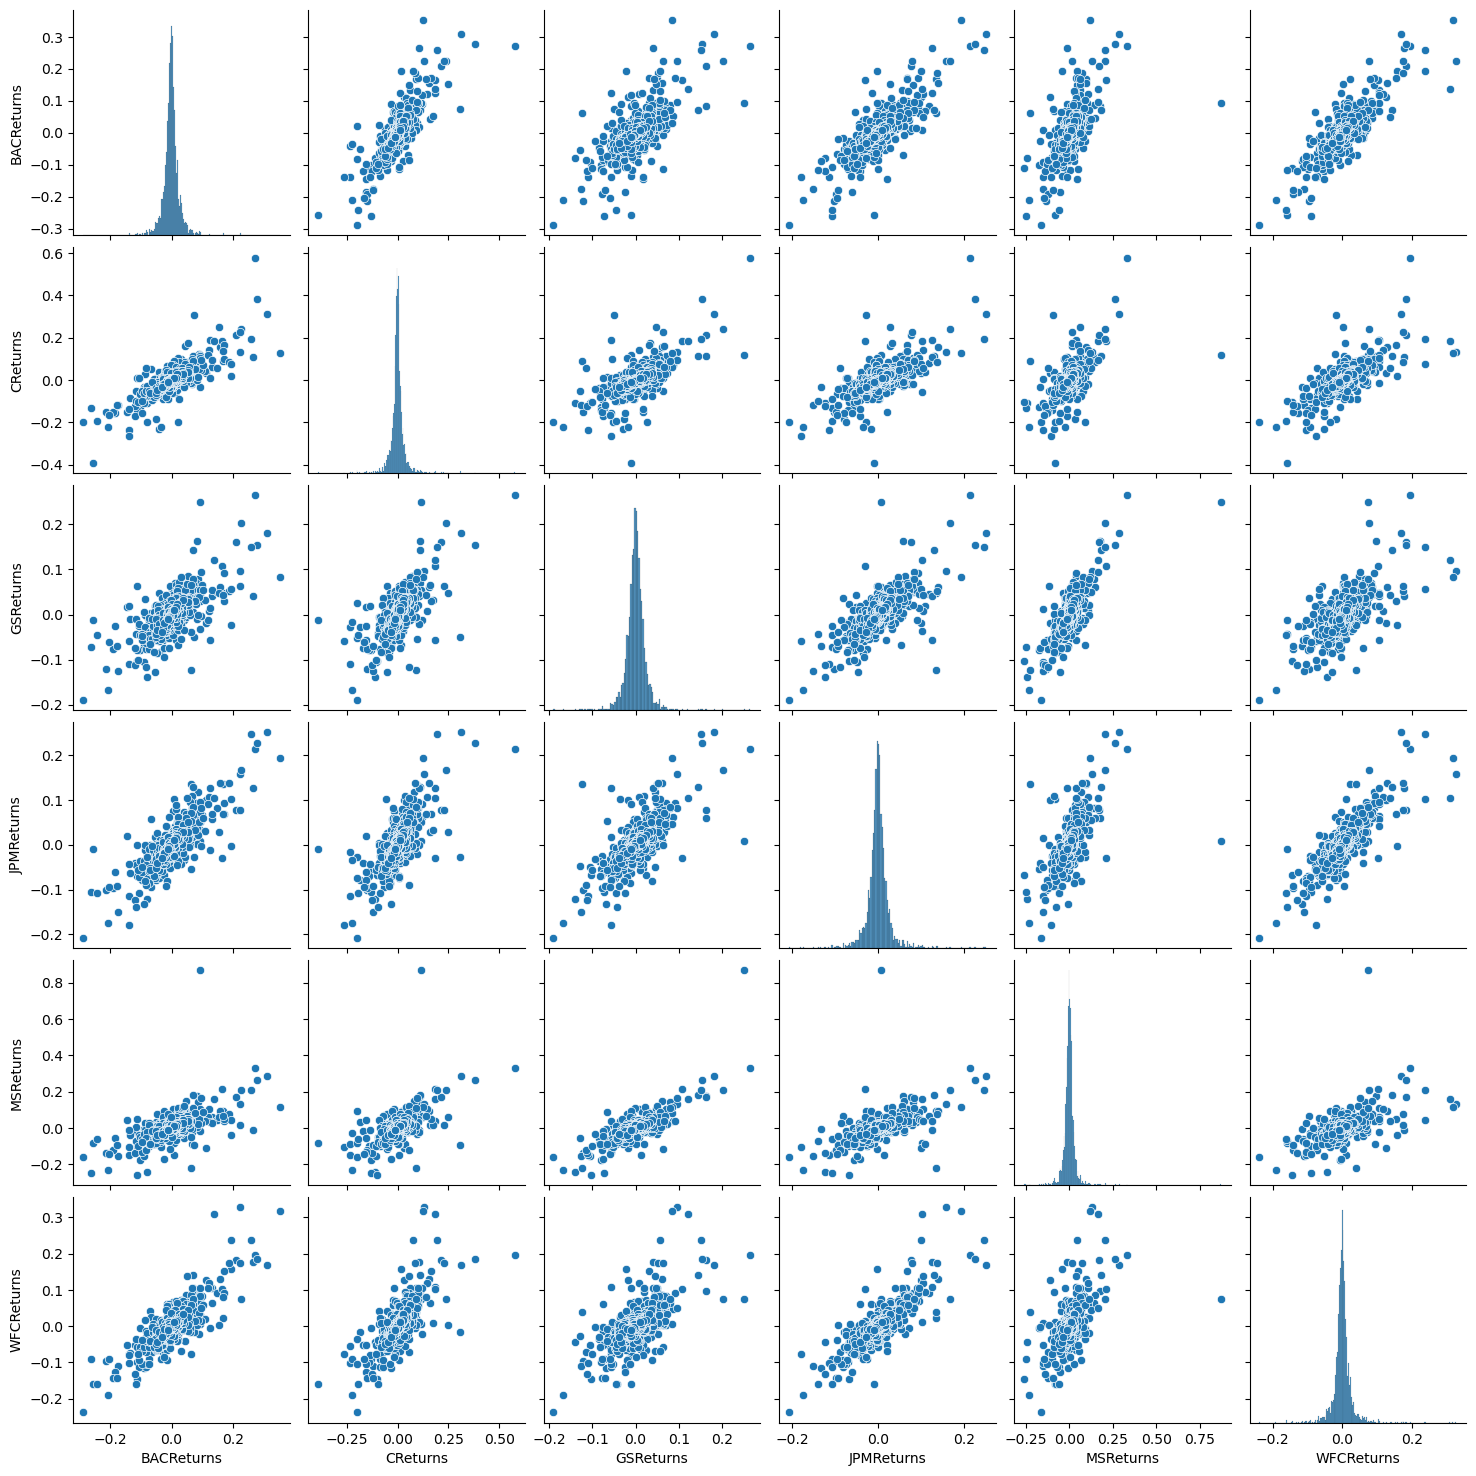

In [61]:
sns.pairplot(returns[1:])

In [65]:
#returns.min()
# date of minimum returns from the stocks
returns.idxmin()

BACReturns   2009-01-20
CReturns     2009-02-27
GSReturns    2009-01-20
JPMReturns   2009-01-20
MSReturns    2008-10-09
WFCReturns   2009-01-20
dtype: datetime64[ns]

## Insights

- From the data we can see that Bank of America, Goldman Sachs and JP Morgans performed worst on the same date 20-01-2009
- On 20-01-2009 US Election results were declared and Mr. Barack Obama was declared as the first black president of United States of America. 
- The stock price drop is expected just before election results.

In [66]:
#returns.max()
# date of maximum returns from the stocks
returns.idxmax()

BACReturns   2009-04-09
CReturns     2008-11-24
GSReturns    2008-11-24
JPMReturns   2009-01-21
MSReturns    2008-10-13
WFCReturns   2008-07-16
dtype: datetime64[ns]

In [67]:
returns.std()

BACReturns    0.036647
CReturns      0.038672
GSReturns     0.025390
JPMReturns    0.027667
MSReturns     0.037819
WFCReturns    0.030238
dtype: float64

In [71]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturns    0.016163
CReturns      0.015289
GSReturns     0.014046
JPMReturns    0.014017
MSReturns     0.016249
WFCReturns    0.012591
dtype: float64

C:\Users\Parul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


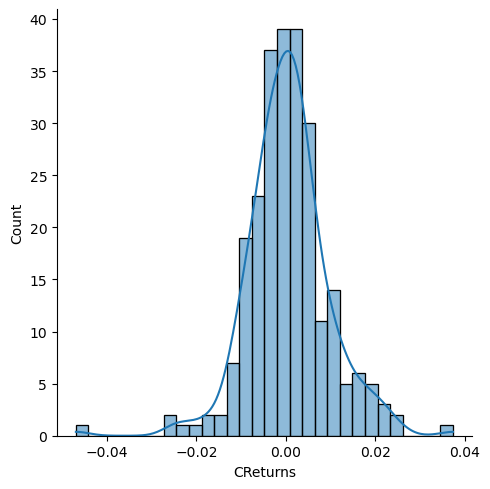

In [83]:

sns.displot(returns.loc['2006-01-01':'2006-12-31']['CReturns'],kde=True,bins=30)

C:\Users\Parul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


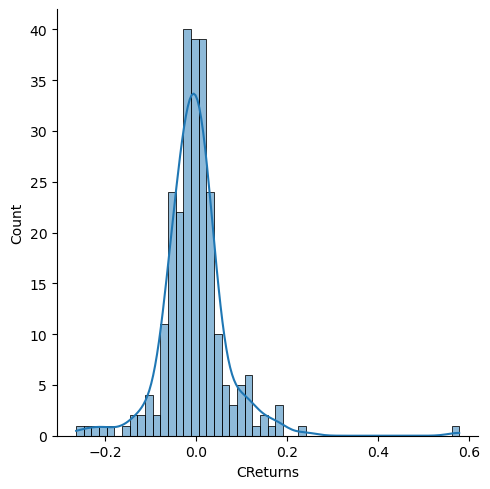

In [81]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['CReturns'],kde=True,bins=50)

## Insights

- The returns for Citi group for the year 2008 is unevenly spread 
- the data is skewed to the left and the deviation is almost 10 times high as compared to 2015 data 
- this anamoly can be explained by the 2008 stock market crash

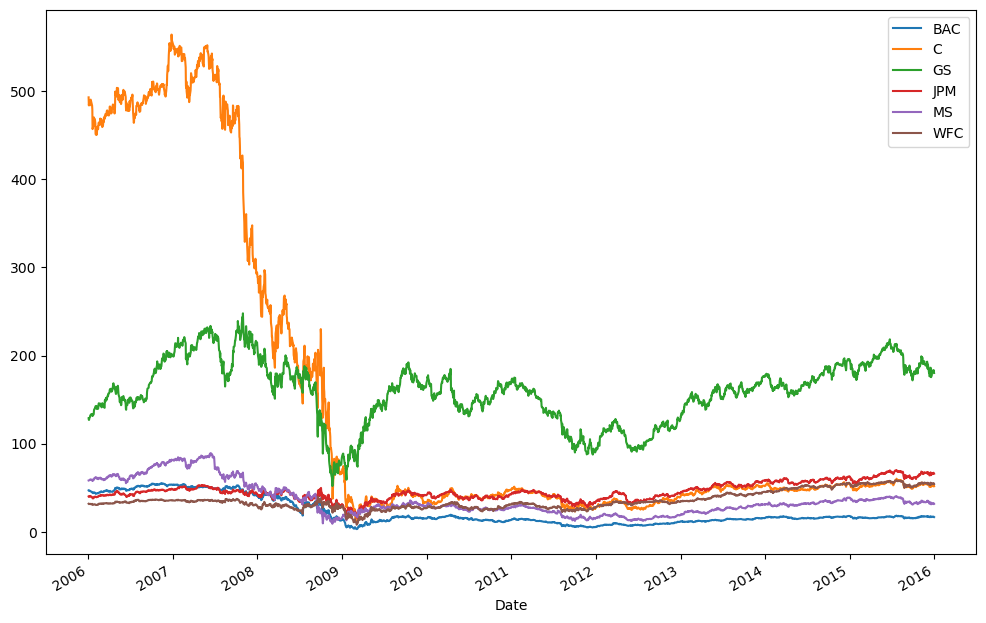

In [86]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,8))
plt.legend()

## Insights

- The above plot explains the crash in stock prices of Citi group stocks during 2008 stock market crash 
- Hence proving our initial observations of Citi group shares to be a risky investments.

In [87]:
# Visualizing the correaltion between stocks

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

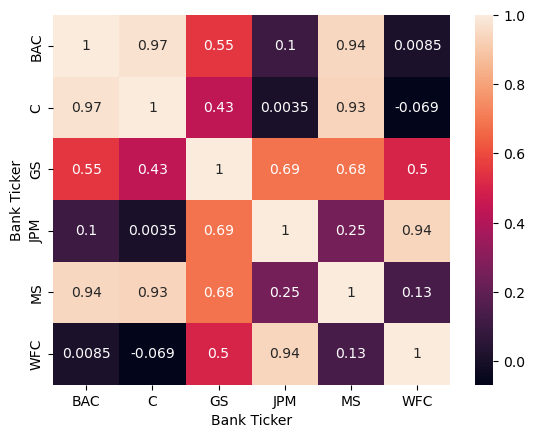

In [90]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

## Insights

- There is huge correlationship between Morgan Stanley and Bank of America stock along with city group and Morgans Stanley and Wells Fargo with JP Morgan 

- In case of any Statisticall model we can remove the closely correlated variables and reduce multi-colinearity inside our Model

In [4]:
#sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)